In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Cleaning

1. Load the dataset
2. Make a copy of the dataset
3. Remove personal data (marked with NaN)
4. Adjust column names (from Unnamed to Other + descriptive title for the column)

In [74]:
df = pd.read_csv("data/muslim_brand_apr_2025.csv")
df = df.drop(index=0).reset_index(drop=True)

In [75]:
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,collector_type_source,...,How often do you hear positive things about Muslims in the media?,"In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?",Would you feel comfortable buying goods or services from a Muslim-owned business?,"If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?","How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?",Gender,Age,Major US Region,Device,Household Income
0,1.188546e+11,460661826.0,04/30/2025 12:53:35 AM,04/30/2025 12:55:17 AM,NaN,NaN,NaN,NaN,ef40bd87bd3358ba2c386b2b70,smc,...,Not often,No,Yes,No,A little,male,60_above,south_atlantic,pc_mac,200000_and_up
1,1.188546e+11,460661826.0,04/30/2025 12:48:31 AM,04/30/2025 12:53:46 AM,NaN,NaN,NaN,NaN,aa5cc16192f7dd43be7f73c040,smc,...,I don't know,No,Yes,Yes,A little,female,60_above,middle_atlantic,pc_mac,50000_to_74999
2,1.188546e+11,460661826.0,04/30/2025 12:49:44 AM,04/30/2025 12:50:12 AM,NaN,NaN,NaN,NaN,a75b1d6fff06bdd392642de54c,smc,...,Often,Yes,Yes,Yes,A great deal,female,45_to_60,middle_atlantic,android_mobile,100000_to_124999
3,1.188546e+11,460661826.0,04/30/2025 12:47:40 AM,04/30/2025 12:49:50 AM,NaN,NaN,NaN,NaN,798e4f361a316f80e9dc53e96d,smc,...,Not often,No,Yes,No,None at all,female,60_above,west_north_central,ios_mobile,75000_to_99999
4,1.188546e+11,460661826.0,04/30/2025 12:47:18 AM,04/30/2025 12:49:46 AM,NaN,NaN,NaN,NaN,bc6569ce49654ea657ac0f31d3,smc,...,Not often,No,Yes,No,A little,male,45_to_60,south_atlantic,android_mobile,175000_to_199999


In [76]:
apr25= df.copy()

In [77]:
apr25 = apr25.drop(columns=['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 
                            'IP Address', 'Email Address', 'First Name', 'Last Name', 
                            'Custom Data 1', 'collector_type_source', 'Device'])

In [78]:
apr25.rename(columns={'Unnamed: 11': "Religion_other"}, inplace= True)
apr25.rename(columns={'Unnamed: 16':"News_other"}, inplace= True)

In [79]:
apr25.columns

Index(['What is your religion?', 'Religion_other',
       'How many muslim people have you talked to in the last 7 days?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Would you feel comfortable buying goods or services from a Muslim-owned business?',
       'If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?',
       'How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?',
       'Gender', 'Age', 'Major US Region', 'Household Income'],
      dtype='object')

In [80]:
apr25.describe()

,What is your religion?,Religion_other,How many muslim people have you talked to in the last 7 days?,How do you feel about Muslim people in America?,What is your level of education?,Where do you get your news from?,News_other,How comfortable do you feel interacting with Muslims in your community?,How often do you hear positive things about Muslims in the media?,"In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?",Would you feel comfortable buying goods or services from a Muslim-owned business?,"If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?","How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?",Gender,Age,Major US Region,Household Income
count,103,13,103,103,103,103,27,103,103,102,102,101,102,103,103,102,103
unique,9,13,5,3,4,9,26,4,3,3,2,2,4,2,4,8,11
top,Christian (Catholic),Espiscopal,None - 0,Good,College,Other (please specify),MSNBC,Very comfortable,Not often,No,Yes,No,A little,female,30_to_44,pacific,25000_to_49999
freq,24,1,50,50,41,27,2,49,50,51,89,53,40,60,32,26,30


# 2. Metrics

## 2.1 Sentiment Proportion

In [81]:
sentiment_prop = apr25['How do you feel about Muslim people in America?'].value_counts(normalize=True).reset_index()
sentiment_prop.columns = ['Category', 'Percentage']
sentiment_prop['Percentage'] *= 100  

In [82]:
sentiment_prop 

,Category,Percentage
0,Good,48.543689
1,Neutral,45.631068
2,Bad,5.825243


In [83]:
print( "Good sentiment percentage:", sentiment_prop.loc[0,'Percentage'])
print( "Neutral sentimen percentaget:", sentiment_prop.loc[1,'Percentage'])
print( "Bad sentiment percentage:", sentiment_prop.loc[2,'Percentage'])

Good sentiment percentage: 48.54368932038835
Neutral sentimen percentaget: 45.63106796116505
Bad sentiment percentage: 5.825242718446602


## 2.2 Positive to Negative Ratio

In [84]:
ratio = apr25['How do you feel about Muslim people in America?'].value_counts().reset_index()
positive_to_negative_ratio = ratio.loc[0,'How do you feel about Muslim people in America?']/\
ratio.loc[2,'How do you feel about Muslim people in America?']

In [85]:
ratio

,index,How do you feel about Muslim people in America?
0,Good,50
1,Neutral,47
2,Bad,6


In [86]:
positive_to_negative_ratio

8.333333333333334

## Positive to Neutral Ratio

In [87]:
positive_to_neutral_ratio = ratio.loc[0,'How do you feel about Muslim people in America?']/\
ratio.loc[1,'How do you feel about Muslim people in America?']

In [88]:
positive_to_neutral_ratio

1.0638297872340425

# Function 1: Plotting Distributions (%)

In [89]:
def plot_percentages(df, column_name, x_label, title):
    """
    Creates a bar plot of the percentage distribution of categories in a column.
    Highlights the largest percentage in red and the rest in grey.
    """
    
    counts_df = df[column_name].value_counts(normalize=True).reset_index()
    counts_df.columns = ['Category', 'Percentage']
    counts_df['Percentage'] *= 100  # Convert to percentage

    max_index = counts_df['Percentage'].idxmax()
    colors = ['grey' if i != max_index else 'red' for i in range(len(counts_df))]
    
    plt.figure(figsize=(8.5, 5.5), dpi=150)
    sns.barplot(x='Category', y='Percentage', data=counts_df, palette=colors)


    plt.title(title, fontsize=10)
    plt.xlabel(x_label, fontsize=8)
    plt.ylabel('Percentage', fontsize=8)

    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(rotation=45, ha='right', fontsize=7)

    plt.tight_layout()
    plt.show()


# Function 2: Plotting Sentiment Breakdown (Good, Neutral, Bad)

In [90]:
def plot_stacked_bar_chart(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View'):
    """
    Plots a stacked bar chart with percentages based on the grouping of two columns, 
    one for categories (e.g., education or religion)
    and the other for sentiments.
    """
    
    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral':'#d1cfcf'
    }
    
    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)
    
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), \
                                 color=[colors[col] for col in grouped_percentage.columns])
    # Add percentage annotations
    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0:  # Only annotate non-zero segments
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        # Position the text in the center of the segment
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        fontsize=8)


    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Position the legend outside the plot
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.figure(figsize=(9, 5), dpi=800)
    plt.show()

# Function 3: Plotting Comfort Levels (%)

In [91]:
def plot_comfort (df, category_col, comfort_level, title, xlabel, ylabel): 
    
    grouped = df.groupby([category_col, comfort_level]).size().reset_index(name='count')
    totals = grouped.groupby(category_col)['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / totals) * 100

    pivot_table = grouped.pivot(index=category_col, columns=comfort_level, values='percentage').fillna(0)

    comfort_colors = {
        'Very comfortable': '#17b50e',  
        'Comfortable': '#9be897',       
        'Neutral': '#e3e1e1',           
        'Uncomfortable': '#cf4229',     
        'Very uncomfortable': '#2ebf26'  
    }



    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), \
                          color=[comfort_colors.get(level) for level in pivot_table.columns])


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1), loc='upper left')


    for i, variable in enumerate(pivot_table.index):
        cumulative_percentage = 0
        for level in pivot_table.columns:
            percentage = pivot_table.loc[variable, level]
            if percentage > 0:
                ax.text(
                    i, cumulative_percentage + (percentage / 2),  
                    f"{percentage:.1f}%", 
                    ha='center', va='center', color='white' if level == 'Very comfortable' else 'black', fontsize=9
                )
                cumulative_percentage += percentage
    

    plt.show()

## Overall Sentiment and Comfort Levels Across All Participants

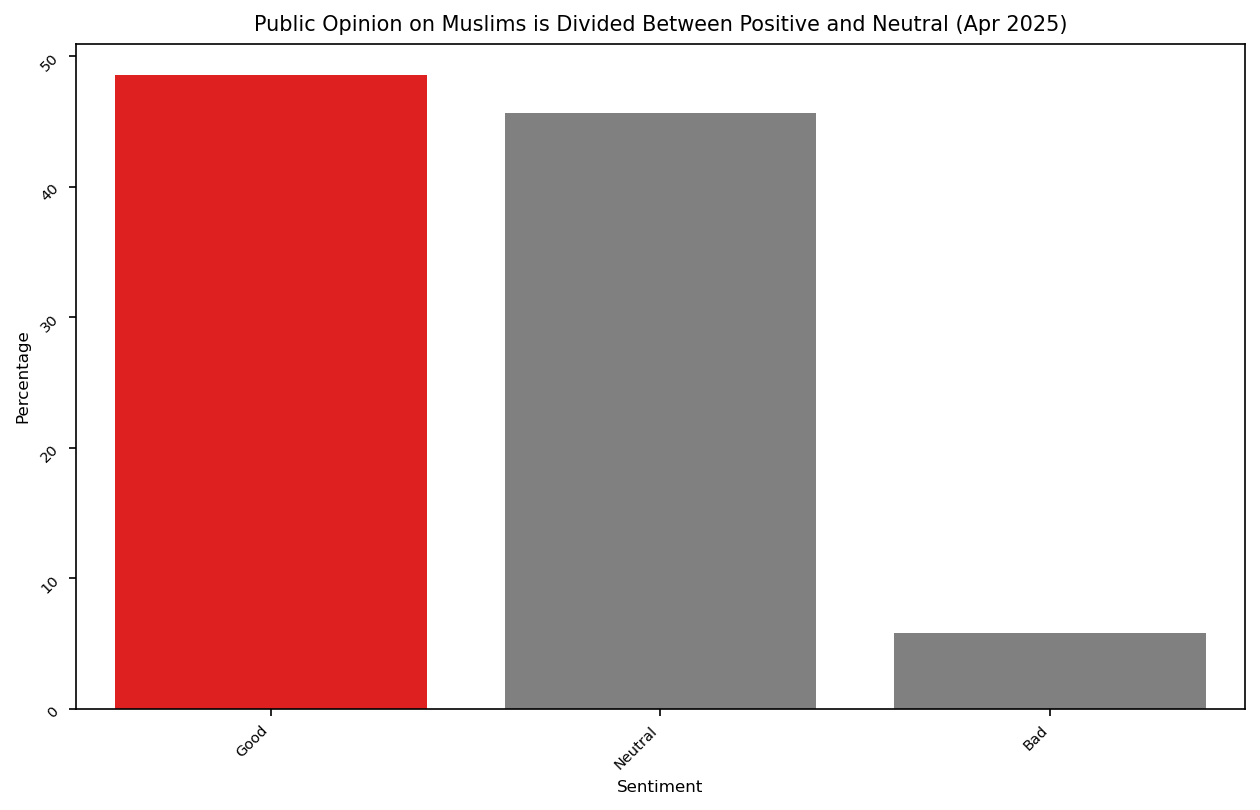

In [92]:
plot_percentages(apr25,'How do you feel about Muslim people in America?', 'Sentiment', \
                 'Public Opinion on Muslims is Divided Between Positive and Neutral (Apr 2025)')

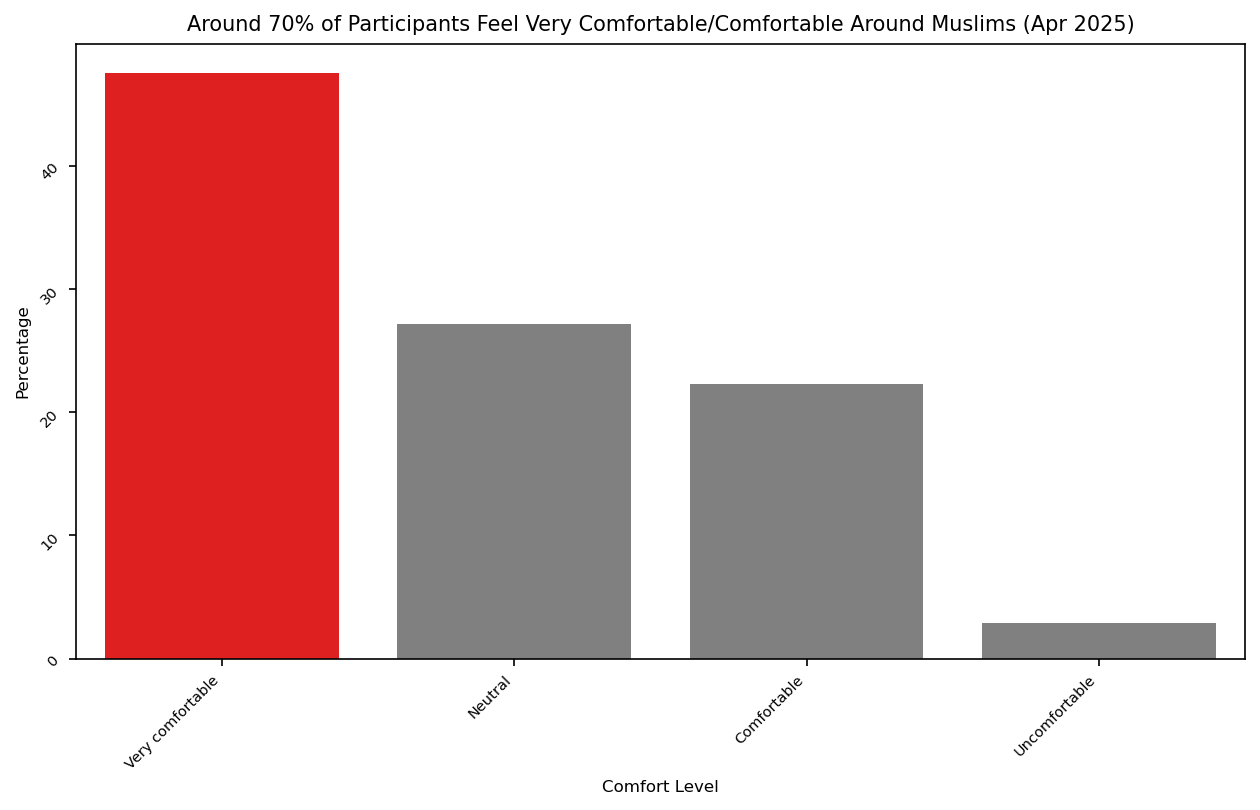

In [96]:
plot_percentages(apr25,'How comfortable do you feel interacting with Muslims in your community?', "Comfort Level",\
                 'Around 70% of Participants Feel Very Comfortable/Comfortable Around Muslims (Apr 2025)')

In [94]:
counts_df = apr25['How comfortable do you feel interacting with Muslims in your community?'].value_counts(normalize=True).reset_index()

In [95]:
counts_df

,index,How comfortable do you feel interacting with Muslims in your community?
0,Very comfortable,0.475728
1,Neutral,0.271845
2,Comfortable,0.223301
3,Uncomfortable,0.029126


# Distribution of Religion

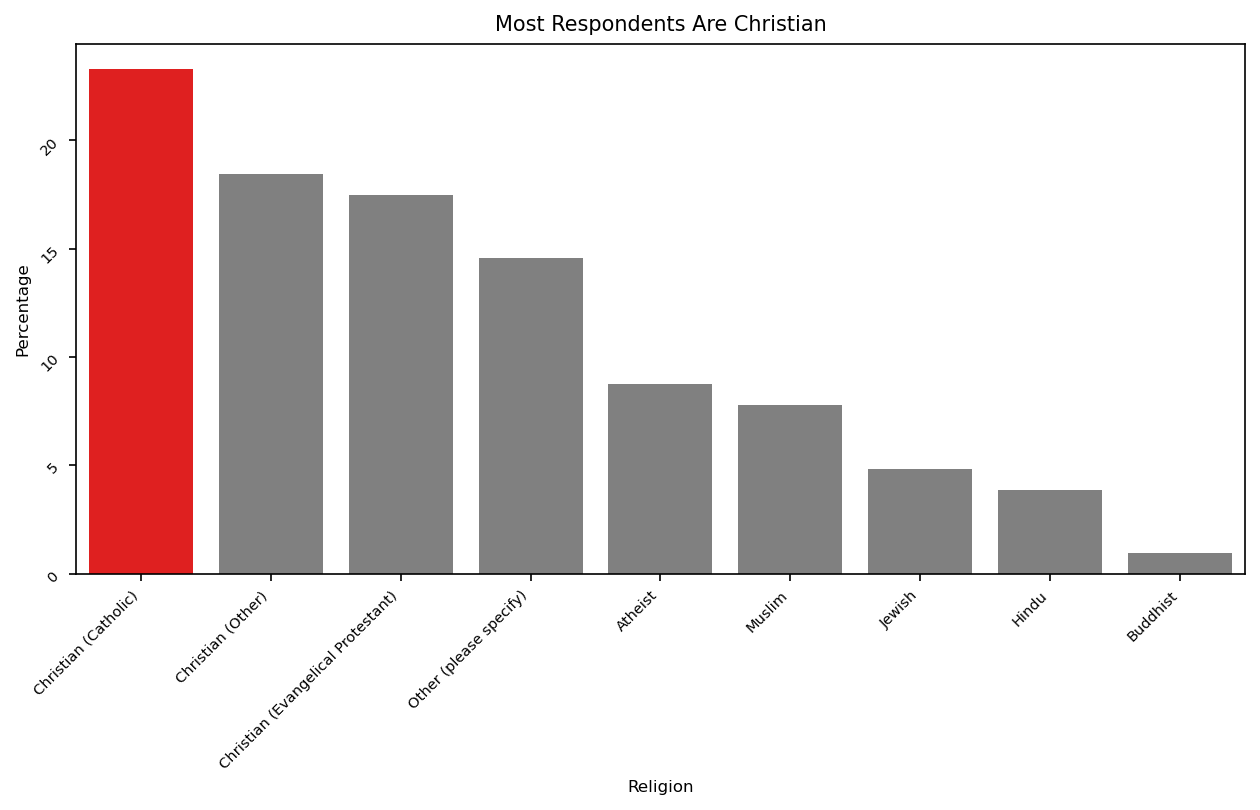

In [118]:
plot_percentages(apr25,'What is your religion?', 'Religion', 'Most Respondents Are Christian')

In [101]:
apr25['What is your religion?'].value_counts(normalize= True)

Christian (Catholic)                  0.233010
Christian (Other)                     0.184466
Christian (Evangelical Protestant)    0.174757
Other (please specify)                0.145631
Atheist                               0.087379
Muslim                                0.077670
Jewish                                0.048544
Hindu                                 0.038835
Buddhist                              0.009709
Name: What is your religion?, dtype: float64

In [117]:
apr25.loc[apr25['What is your religion?'] == 'Other (please specify)']['Religion_other']


1                                             Espiscopal
6                                     Non denominational
8                                                  Fuuuj
13                                    I have no religion
19     Snarling deistic agnostic with a chip on his s...
20                                                   NaN
23                                                  None
35                        Latter-day Saint (i.e. Mormon)
42                                               nothing
53                                                   Tub
79                                     humanist agnostic
82                                              personal
89                                             Spiritual
101                                                  NaN
102                                                  LDS
Name: Religion_other, dtype: object

# Religious Differences in Attitudes Toward Muslims

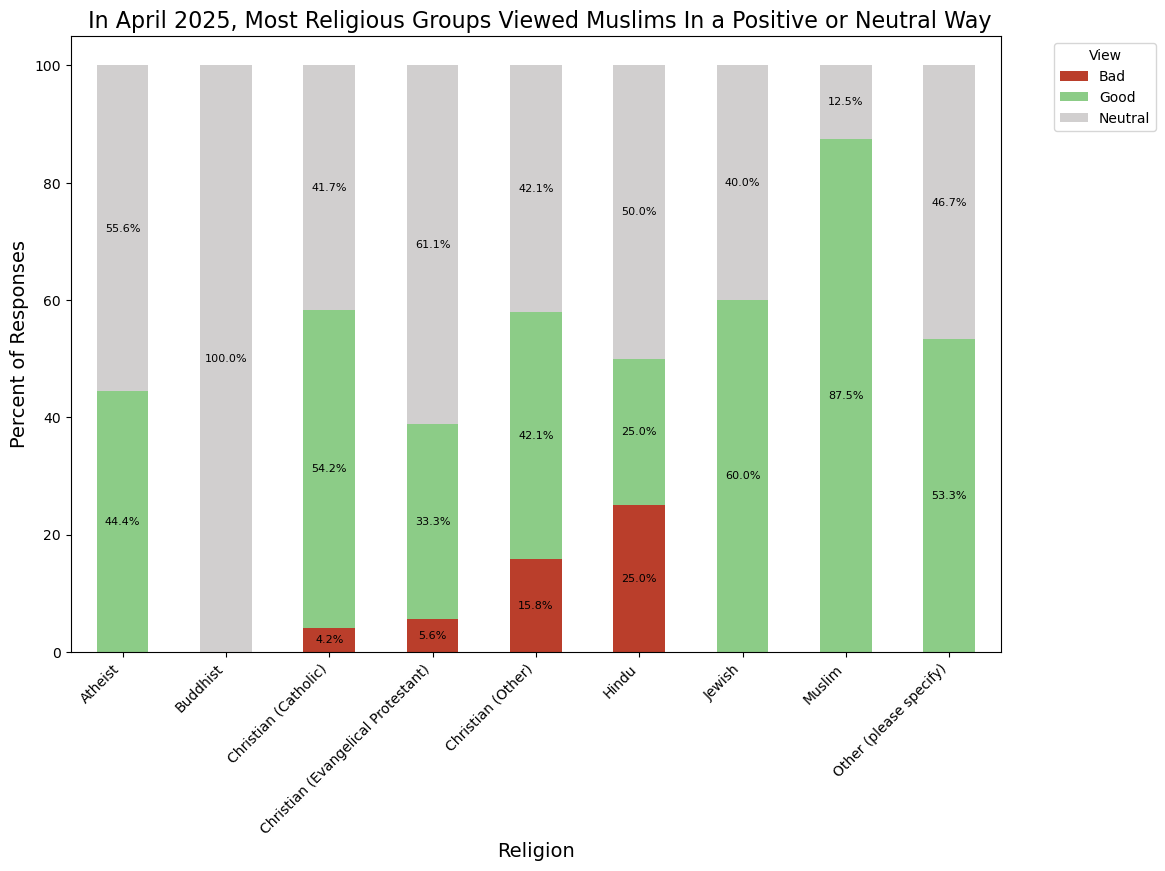

<Figure size 7200x4000 with 0 Axes>

In [119]:
plot_stacked_bar_chart(
    df=apr25,  
    title=' In April 2025, Most Religious Groups Viewed Muslims In a Positive or Neutral Way',
    xlabel='Religion',
    ylabel='Percent of Responses',
    cat_col='What is your religion?',
    sent_col='How do you feel about Muslim people in America?',
)

No group was overwhelmingly negative—most respondents across all groups held neutral or favorable views.

Muslims themselves reported the most positive views (87.5%), followed by Jewish respondents (60%) and “Other” religious identities (53.3%).

Christian groups showed more variation:

Catholics and Evangelical Protestants leaned neutral or positive (with low "bad" ratings).

Christian (Other) had the highest negative view (15.8%) among Christian subgroups.

Hindus had a significant share of negative views (25%), the highest of any group shown. They seem to remain consistent with their views throughout the months surveyed

Buddhists reported only neutral perceptions—100% of their responses were neither positive nor negative. In January 2025,Buddhists reported mixed feelings of both positive and neutral but it seems that the sentiment has shifted towards a more neutral side

Atheists were almost evenly split: 44.4% positive, 55.6% neutral, with no negative sentiments



# Breakdown of Comfort Level Across Religious Groups

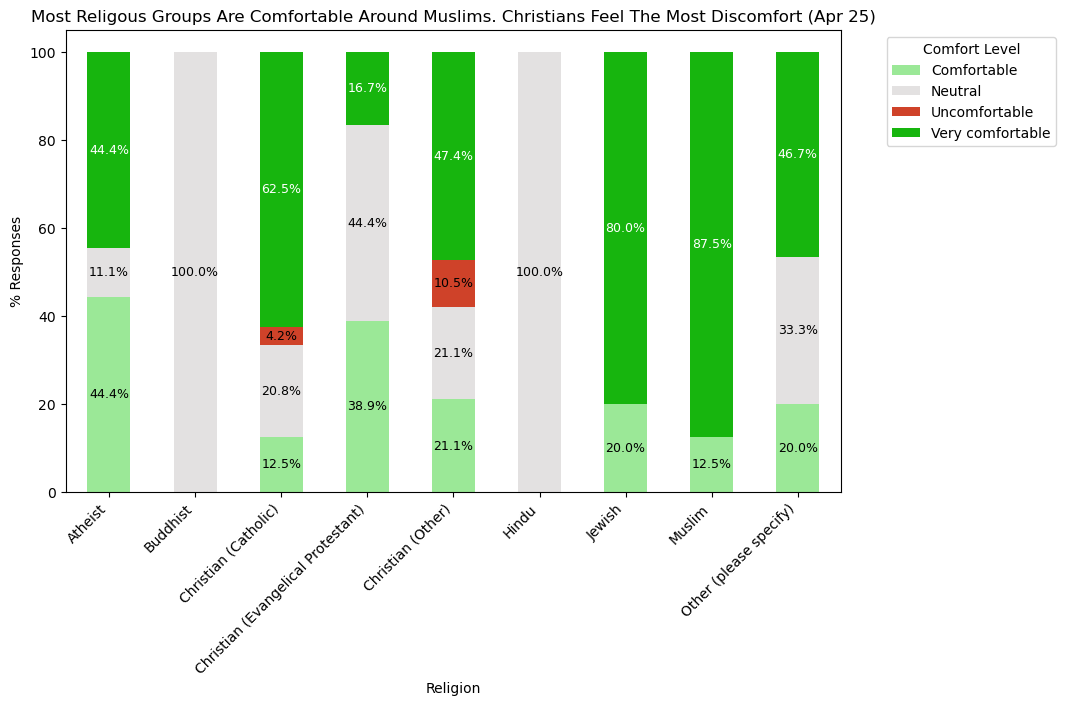

In [122]:
plot_comfort(
    df= apr25, 
    category_col= 'What is your religion?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Most Religous Groups Are Comfortable Around Muslims. Christians Feel The Most Discomfort (Apr 25)',
    xlabel='Religion',
    ylabel='% Responses',
)


Muslims again showed the highest internal comfort: 87.5% felt very comfortable.

Jewish respondents also reported high comfort, with 80% very comfortable and 20% comfortable — 0% neutral or uncomfortable.

Atheists were evenly split: 44.4% comfortable, 44.4% very comfortable, and only 11.1% neutral.

Christian (Catholic) and Evangelical Protestants leaned toward comfort as well, though Catholics had a small percentage (4.2%) feeling uncomfortable.

Christian (Other) respondents stood out with 10.5% feeling uncomfortable — the highest discomfort level among all groups.

Buddhists and Hindus were entirely neutral (100%), suggesting uncertainty or unfamiliarity more than active discomfort.

"Other" religions were split, with 66.7% comfortable/very comfortable and a significant 33.3% neutral.



# Educational Differences in Attitudes Towards Muslims

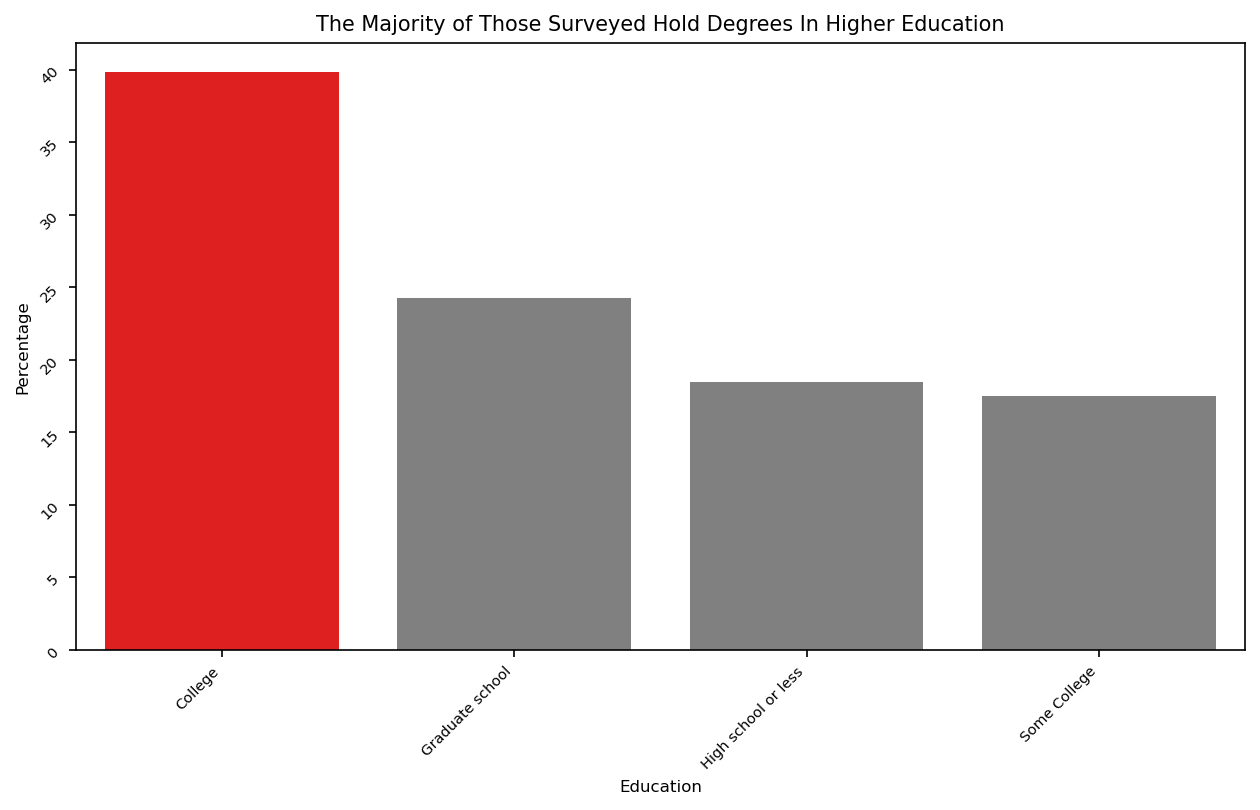

In [124]:
plot_percentages(apr25,'What is your level of education?', 'Education',
           'The Majority of Those Surveyed Hold Degrees In Higher Education')

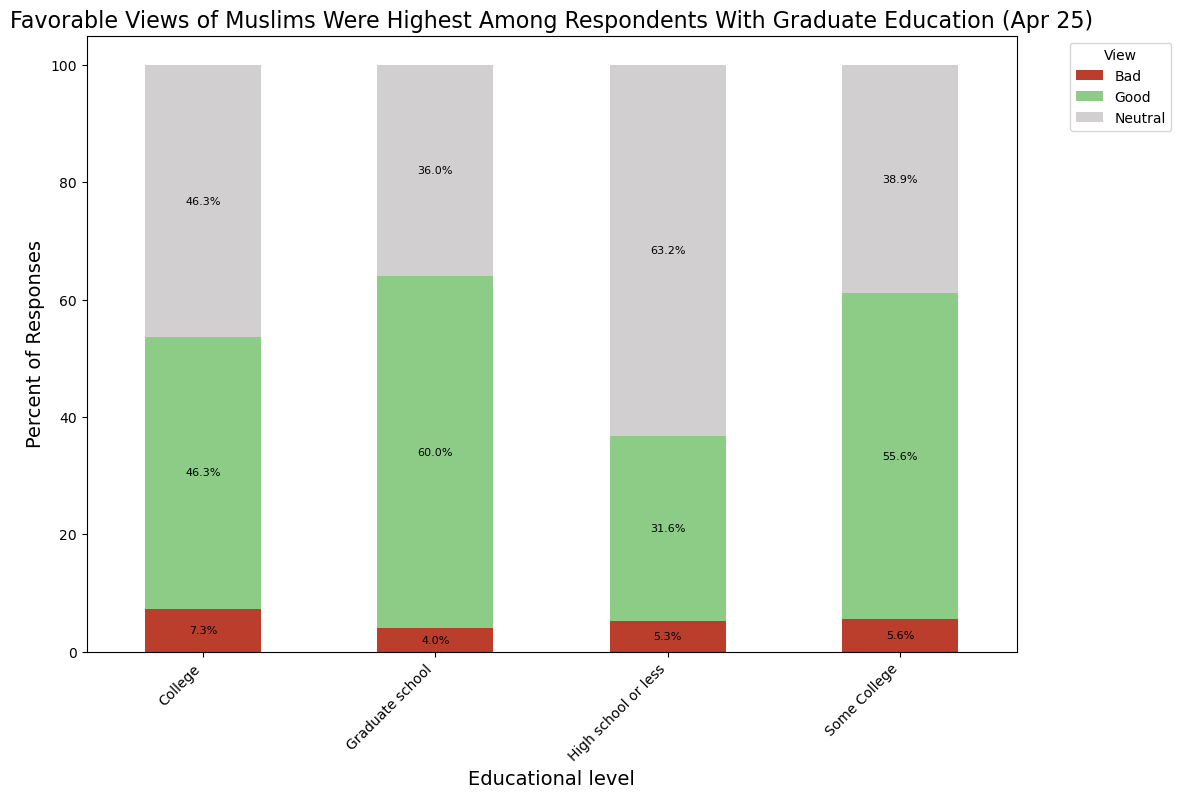

<Figure size 7200x4000 with 0 Axes>

In [126]:
plot_stacked_bar_chart(
    df=apr25, 
    title='Favorable Views of Muslims Were Highest Among Respondents With Graduate Education (Apr 25)',
    xlabel='Educational level',
    ylabel='Percent of Responses',
    cat_col='What is your level of education?',
    sent_col='How do you feel about Muslim people in America?'
)

Graduate school respondents had the highest proportion of favorable views (60%) and the lowest share of negative views (4%).

College and some college respondents also showed strong positivity (46–56%), with neutral responses fairly common.

High school or less had the lowest favorable rating (31.6%) and the highest neutral response rate (63.2%), suggesting more uncertainty or lack of familiarity.

Across all education levels, outright negative views remained low, ranging from 4% to 7.3%.

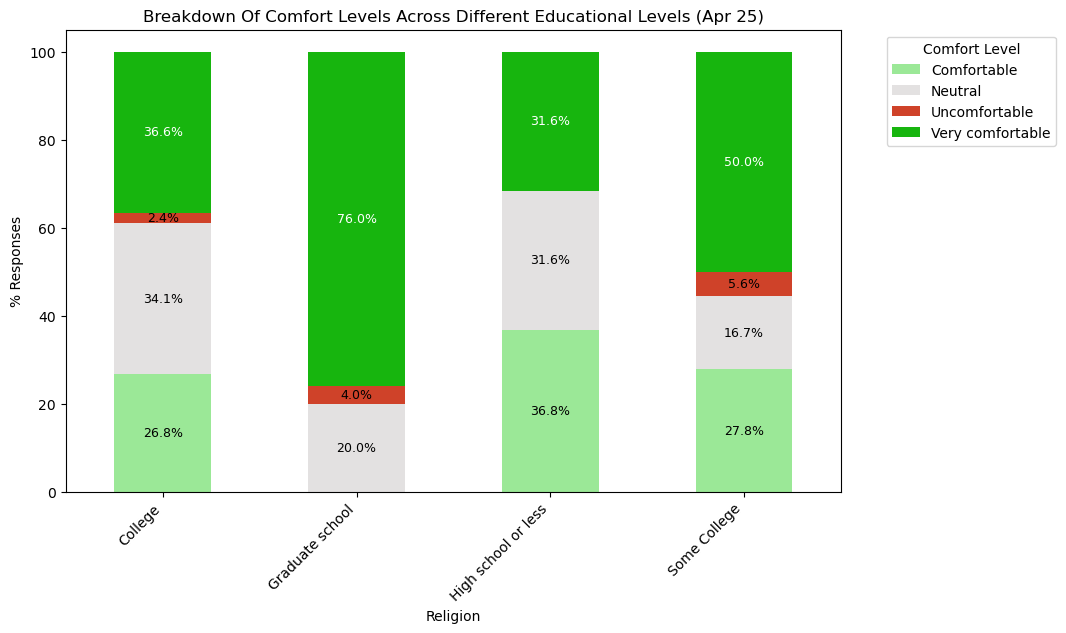

In [128]:
plot_comfort(
    df= apr25, 
    category_col= 'What is your level of education?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Educational Levels (Apr 25)',
    xlabel='Religion',
    ylabel='% Responses',
)

Between January and April 2025, reported discomfort toward Muslims emerged across all educational levels — with the exception of the “High School or Less” group — where previously no discomfort had been recorded.

In the “College” group, there was a modest increase in neutral responses (from 30.8% to 34.1%), accompanied by a slight decline in both “Comfortable” and “Very Comfortable” sentiments. This shift suggests a growing sense of indifference, along with the introduction of some discomfort (2.4%).

Among those with a graduate-level education, the data shows a notable 25-point increase in “Very Comfortable” responses (from 51.4% to 76%). However, this shift is not purely positive—there was also a small uptick in both neutrality and discomfort (from 0% to 4.0%).

For respondents with “Some College” education, the percentage reporting “Very Comfortable” rose (from 36.4% to 50%), but this came alongside a drop in neutrality and the introduction of discomfort (5.6%), suggesting a mild polarization.